In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Logistic Regression

Logistic Regression is a binary classification algorithm used to predict the probability of occurrence of an event based on one or more independent variables.
In logistic regression, a linear regression model is applied to the data, and the resulting continuous output is transformed using a sigmoid function to produce probabilities ranging from 0 to 1.

Steps involved:

Data Preprocessing: Clean and preprocess the data.

Model Training: Compute the weighted sum of input features and pass it through a logistic function to get the probability.

Cost Function: Use the logistic loss function to minimize the error between predicted probabilities and actual labels.

Gradient Descent: Update weights iteratively to minimize the cost function.

Prediction: Classify instances based on the threshold probability.

Advantages:
Simple and interpretable.
Efficient for linearly separable data.

Disadvantages:
Assumes linear decision boundary.
Sensitive to outliers.

##### Formulas

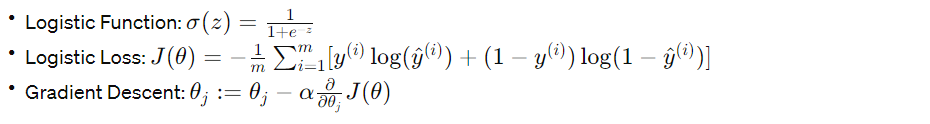

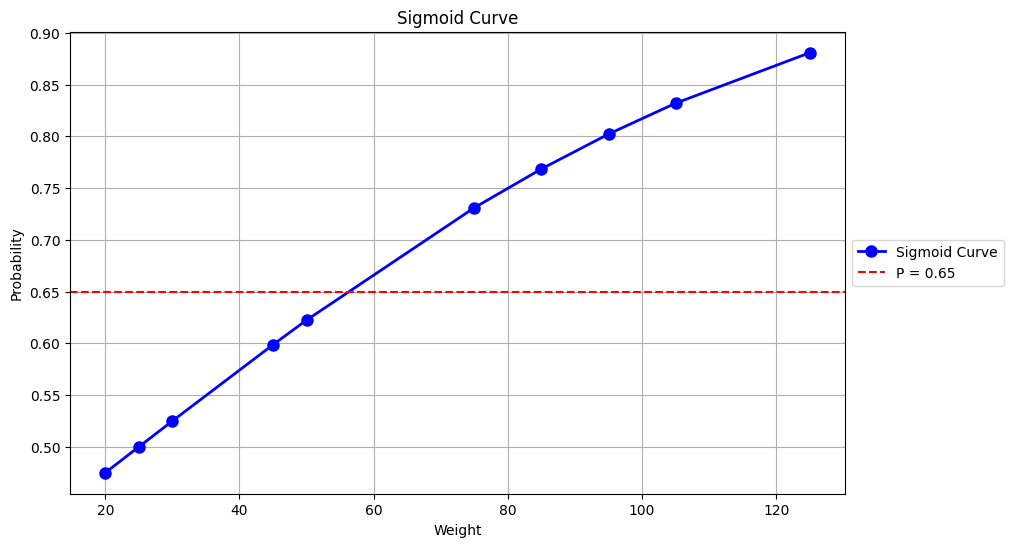

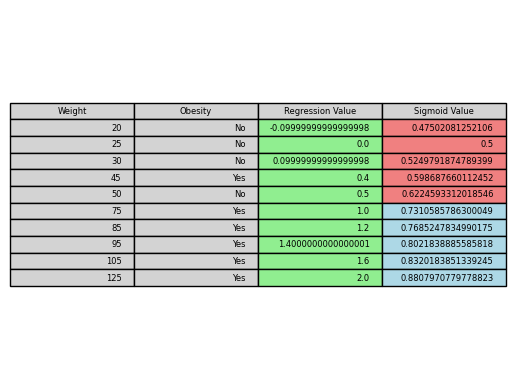

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given dataset
weight = np.array([20, 25, 30, 45, 50, 75, 85, 95, 105, 125])
obesity = np.array(["No", "No", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes"])

# Linear regression coefficients (slope and intercept)
m = 0.02  # Example slope
b = -0.5  # Example intercept

# Calculate regression value
regression_value = m * weight + b

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Calculate sigmoid value
sigmoid_value = sigmoid(regression_value)

# Determine if the individual is obese based on sigmoid value
obese = ['Obese' if p > 0.65 else 'Not Obese' for p in sigmoid_value]

# Create DataFrame with all columns
df = pd.DataFrame({
    'Weight': weight,
    'Obesity': obesity,
    'Regression Value': regression_value,
    'Sigmoid Value': sigmoid_value
})

# Plot the sigmoid curve
plt.figure(figsize=(10, 6))
plt.plot(weight, sigmoid_value, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Sigmoid Curve')
plt.axhline(y=0.65, color='red', linestyle='--', label='P = 0.65')
plt.xlabel('Weight')
plt.ylabel('Probability')
plt.title('Sigmoid Curve')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the sigmoid curve plot
plt.grid(True)
plt.show()

# Plot the table with color-coded Obesity column
cell_text = []
for row in range(len(df)):
    cell_text.append([str(val) for val in df.iloc[row]])

cell_colours = [['lightgray', 'lightgray', 'lightgreen', 'lightblue' if x > 0.65 else 'lightcoral'] for x in df['Sigmoid Value']]
plt.table(cellText=cell_text, colLabels=df.columns, colColours=['lightgray']*4,
          cellColours=cell_colours,
          loc='center')
plt.axis('off')  # Turn off axis
plt.show()

#### Logistic Regression Code

In [3]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Make predictions
predictions = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Cross-validation
cross_val_accuracy = np.mean(cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy'))
print(f"Cross-validated Accuracy: {cross_val_accuracy}")

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Cross-validated Accuracy: 0.9733333333333334


#### Plot of Sigmoid curve

Sigmoid Curve (Blue Line):

The sigmoid function is used in logistic regression to model the probability that a given input belongs to the positive class (Class 1).
The curve is characterized by an S-shape, asymptotically approaching 0 on the left and 1 on the right. It smoothly transforms input values to probabilities.
Actual Points (Red and Green Dots):

Each point represents an observation from the test dataset.
Points are color-coded based on their true class labels: Class 0 (red) and Class 1 (green).
The logistic regression model predicts the probability of each point belonging to Class 1.
Threshold Line (Black Dashed Line):

A horizontal line is drawn at a threshold probability of 0.5.
This threshold is commonly used to determine class membership: if the predicted probability exceeds 0.5, the observation is classified as Class 1; otherwise, it is classified as Class 0.

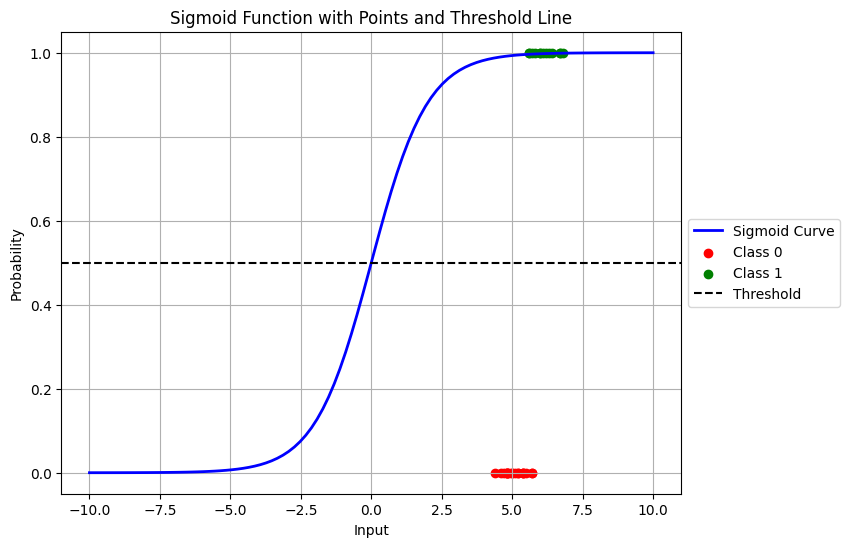

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot Sigmoid Curve with Points and Threshold Line
plt.figure(figsize=(8, 6))

# Plot sigmoid curve
x_values = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x_values))
plt.plot(x_values, sigmoid, color='blue', lw=2, label='Sigmoid Curve')

# Plot actual points for each class
plt.scatter(X_test[y_test == 0, 0], predictions[y_test == 0], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1, 0], predictions[y_test == 1], color='green', label='Class 1')

# Add a horizontal threshold line
threshold = 0.5
plt.axhline(y=threshold, color='black', linestyle='--', label='Threshold')

plt.xlabel('Input')
plt.ylabel('Probability')
plt.title('Sigmoid Function with Points and Threshold Line')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.show()